# UFO Casus

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c_date_parser = lambda x: datetime.strptime(x, "%m-%d-%Y %H:%M")

In [164]:
date_parser = pd.to_datetime
dataUfo = pd.read_csv("datasets/ufo.csv"
                     ) # Fixen!!

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data cleaning

In [165]:
del dataUfo['visit (seconds)']
del dataUfo['duration (seconds)']
del dataUfo['comments']
del dataUfo['duration (hours/min)']
del dataUfo['date posted']

num_cols = dataUfo.columns[dataUfo.apply(pd.to_numeric, errors='coerce').any()]
dataUfo[num_cols] = dataUfo[num_cols].apply(pd.to_numeric, errors='coerce')
dataUfo = dataUfo[dataUfo.select_dtypes(['number']).notnull().all(1)]

dataUfo = dataUfo.dropna()

### Opgeschoond dataframepie ufo's

In [166]:
dataUfo

,datetime,city,state,country,shape,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,29.883056,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,36.595000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,41.117500,-73.408333
...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,38.297222,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,38.901111,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,35.652778,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,34.376944,-82.695833


In [167]:
dataUfo.dtypes

datetime      object
city          object
state         object
country       object
shape         object
latitude     float64
longitude    float64
dtype: object

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

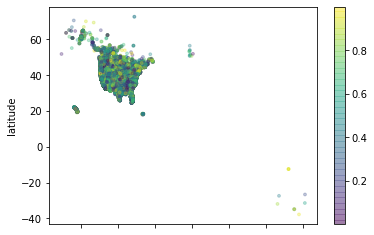

In [168]:
rng = np.random.RandomState(0)
colors = rng.rand(71279)
sizes = 10 * rng.rand()

dataUfo.plot.scatter(x='longitude', y='latitude', c=colors, s=sizes, alpha=0.3, cmap='viridis')



### USA population en jaartal vanaf 1940

In [169]:
dataPop = pd.read_csv("datasets/population.csv")
dataPop = dataPop[dataPop.year >= 1940]
dataPop

,year,population
33,1940,132164569
34,1950,151325798
35,1960,179323175
36,1970,203211926
37,1980,226545805
38,1990,248709873
39,2000,281421906
40,2010,308745538
41,2020,332639000


#### Visualiseren

Text(0, 0.5, 'Bevolking in hondermiljoenen')

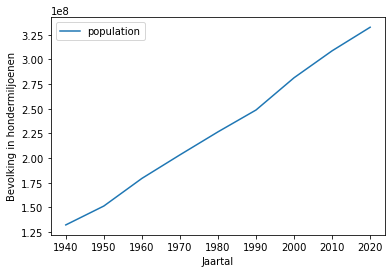

In [170]:
ax = dataPop.plot(x='year', y='population')
ax.set_xlabel('Jaartal')
ax.set_ylabel('Bevolking in hondermiljoenen')



## Wat is het verband tussen het aantal waarnemingen per 1000 inwoners in de VS en het jaartal?

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

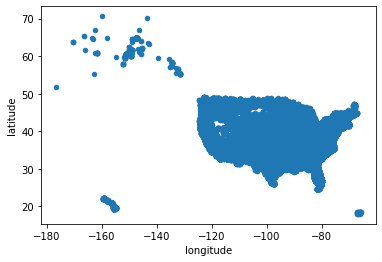

In [173]:
dataUfo = dataUfo[dataUfo.country == 'us']
dataUfo.plot.scatter(x='longitude', y='latitude')